Implement the Image classification CNN model for classifying hand-written 
MNIST dataset by dividing the model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model's architecture
c. Training the model
d. Estimating the model's performance

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D

C:\Users\Neha\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


a. Loading and preprocessing the image data 

In [3]:
# Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
input_shape = (28,28,1)

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
print("shape of training ",x_train.shape)
print("shape of testing ",x_test.shape)

shape of training  (60000, 28, 28, 1)
shape of testing  (10000, 28, 28, 1)


b. Defining the model's architecture

In [5]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

c. Training the model

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
h = model.fit(x_train,y_train,epochs=2, validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 108s 55ms/step - loss: 0.2035 - accuracy: 0.9379 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 2/2
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0818 - accuracy: 0.9747 - val_loss: 0.0693 - val_accuracy: 0.9786


d. Estimating the model's performance

In [8]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)


313/313 [==============================] - 5s 15ms/step - loss: 0.0693 - accuracy: 0.9786
Loss=0.069
Accuracy=0.979


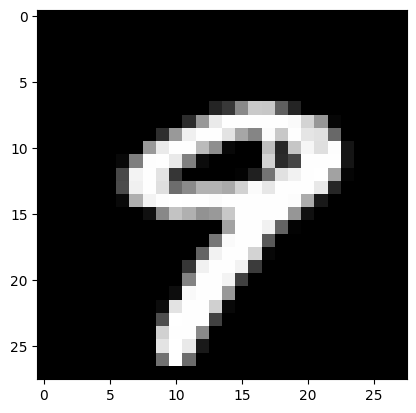

In [9]:
#showing image at position[] from dataset:
image = x_test[9]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [10]:
#predicting the class of image:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print("predicted class : {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 452ms/step
predicted class : 9


In [11]:
h = h.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

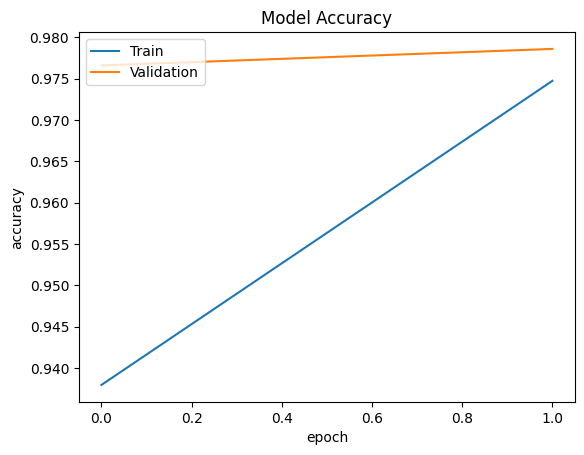

In [12]:
# Plot training & validation loss values
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

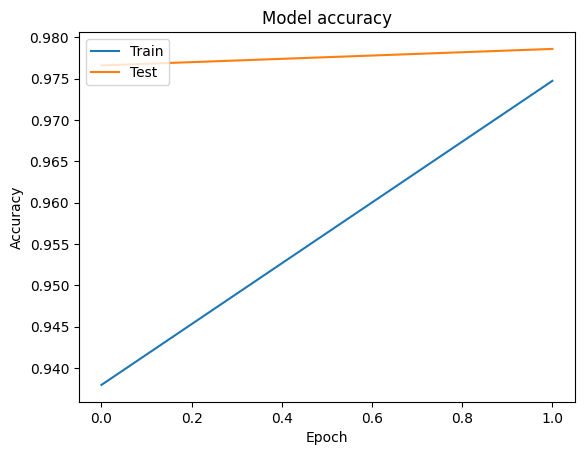

In [14]:
# Plot training & validation accuracy values
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
     